In [125]:
# Importing the necessary packages for analyzing our data.

%matplotlib inline

import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [126]:
# Load dataset (a csv file containing information about all the songs) into variable 'lyrics'.

lyrics = pd.read_csv("lyrics_all.txt")

# Inspect the first 5 rows to see what the data looks like.

lyrics.head()

,album_name,track_title,track_n,lyric,line
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5


In [127]:
# Print the information pertaining to the dataset (ie. number of rows/columns, column names, data type).
# 'Year of release' is noticeably absent from data set.

lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7597 entries, 0 to 7596
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   album_name   7597 non-null   object
 1   track_title  7597 non-null   object
 2   track_n      7597 non-null   int64 
 3   lyric        7597 non-null   object
 4   line         7597 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 296.9+ KB


In [128]:
# Print a list of all the albums in this data set.

print(lyrics.album_name.unique())

['Taylor Swift' 'Fearless (Taylor’s Version)' 'Speak Now (Deluxe)'
 'Red (Deluxe Edition)' '1989 (Deluxe)' 'reputation' 'Lover'
 'folklore (deluxe version)' 'evermore (deluxe version)' 'Midnights']


In [129]:
# Defining a function to map the name of the album to the year it was released.

def album_release(row):  
    if row['album_name'] == 'Taylor Swift':
        return '2006'
    elif row['album_name'] == 'Fearless (Taylor’s Version)':
        return '2008'
    elif row['album_name'] == 'Speak Now (Deluxe)':
        return '2010'
    elif row['album_name'] == 'Red (Deluxe Edition)':
        return '2012'
    elif row['album_name'] == '1989 (Deluxe)':
        return '2014'
    elif row['album_name'] == 'reputation':
        return '2017'
    elif row['album_name'] == 'Lover':
        return '2019'
    elif row['album_name'] == 'folklore (deluxe version)':
        return '2020'
    elif row['album_name'] == 'evermore (deluxe version)':
        return '2021'
    elif 'Midnights' in row['album_name']:
        return '2022'
    
    return 'No Date'


# Applying the album release function to every row of the data set.

lyrics['album_year'] = lyrics.apply(album_release, axis = 1)

# Inspect the first five rows of the data set again to make sure the corresponding years
# were successfully added.

lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [130]:
# Convert lyrics to lowercase so that all occurances of the same word are considered the same, regardless of captilization.
# Save the result in a new data column called 'clean_lyric'.

lyrics['clean_lyric'] = lyrics['lyric'].str.lower()

# Remove punctuation characters.

lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace(',','')
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace('"','')
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace("'",'')
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace(")",'')
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace("(",'')
lyrics['clean_lyric'] = lyrics['clean_lyric'].str.replace("?",'')

# Print the first five lines again to confirm correct changes.

lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said thats a lie
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin stuck


In [131]:
# Create a list of "stop" words to remove.  These don't hold any value for our analysis.

stop = [
    'a', 'an', 'and', 'the', 'is', 'of', 'in', 'to', 'it', 'that', 'this', 'was',
    'with', 'for', 'as', 'on', 'at', 'by', 'but', 'be', 'are', 'were', 'from',
    'or', 'if', 'not', 'have', 'has', 'had', 'who', 'which', 'am', 'being', 'been',
    'what', 'when', 'where', 'how', 'why', 'will', 'can', 'could', 'should', 'would',
    'there', 'then', 'those', 'here', 'there'
]


# Further clean our lyrics by removing stop words. 

# This function goes through all the words in our clean_lyric column.  If a word is not a stop word, add it to our
# final list of cleaned words.  Then, join all the words in the list back together into a single string, separated by
# a space.
def clean_lyric_text(text):
    words = text.split()
    cleaned_words = []
    for word in words:
        if word not in stop:
            cleaned_words.append(word)
    cleaned_text = ' '.join(cleaned_words)
    return cleaned_text


lyrics['clean_lyric'] = lyrics['clean_lyric'].apply(clean_lyric_text)

In [132]:
# Inspect the first five rows.
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said way my blue eyes shined
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said thats lie
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just boy chevy truck
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck


In [133]:
# Create a new column to reflect if the lyrics contain midnight

lyrics['midnight'] = lyrics['clean_lyric'].str.contains('midnight')

# Print the number of lines containing the word "midnight".

sum(lyrics['midnight'])

17

In [134]:
# Making lists of words that are categorically similar, to see if they are referenced in the songs.

night = ['night', 'midnight', 'dawn', 'dusk', 'evening', 'late', 'dark', '10pm', '11pm', '12am', '1am', '2am', '3am', '4am']
day = ['day', 'morning', 'light', 'sun', 'dawn', 'noon', 'golden', 'bright', '6am', '7am', '8am', '9am', '10am', '12pm']
time = ['today', 'tomorrow', 'yesterday', 'clock', 'hour', 'time', 'minute', 'second', 'past', 'present', 'future', 'moment']

In [135]:
# Regex pattern for each list to help with the searching.
night_regex = '|'.join(night)
day_regex = '|'.join(day)
time_regex = '|'.join(time)

# Creating a new column for each of the categories of words above, containing a boolean (either true or false) based on
# whether the lyrical line contains one of the words present in the lists.
lyrics['night'] = lyrics['clean_lyric'].str.contains(night_regex)
lyrics['day'] = lyrics['clean_lyric'].str.contains(day_regex)
lyrics['time'] = lyrics['clean_lyric'].str.contains(time_regex)

# Count the number of True values.
night_count = sum(lyrics['night'])
day_count = sum(lyrics['day'])
time_count = sum(lyrics['time'])

# Print the counts.
print("night words: ", night_count)
print("day words: ", day_count)
print("time words: ", time_count)

night words:  230
day words:  288
time words:  319


In [136]:
# Inspect the first 5 rows again.
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said way my blue eyes shined,False,False,False,False
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said thats lie,False,False,False,False
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just boy chevy truck,False,False,False,False
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False


In [137]:
# Create a new dataframe for yearly mentions, that group the occurrences of night, day, and time words by year.
yearly_mentions = lyrics.groupby('album_year').sum().reset_index()

yearly_mentions[['album_year', 'midnight', 'night', 'day', 'time']]

,album_year,midnight,night,day,time
0,2006,0,17,24,22
1,2008,0,21,19,25
2,2010,0,25,42,36
3,2012,1,41,40,66
4,2014,1,19,26,17
5,2017,3,25,25,35
6,2019,0,22,46,13
7,2020,1,8,17,47
8,2021,2,18,34,27
9,2022,9,34,15,31


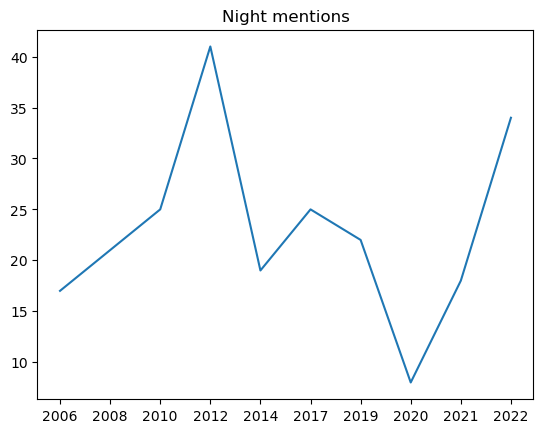

In [138]:
# Plotting the mentions of 'night' over the years.

plt.plot(yearly_mentions['album_year'], yearly_mentions['night'])
plt.title("Night mentions")
plt.show()

In [139]:
# Correcting the album names.

list_of_album_names = ["Taylor Swift", "Fearless", "Speak Now", "Red", "1989", "Reputation", "Lover", "Evermore", "Folklore", "Midnights"]

for i in range(10):
    yearly_mentions.at[i, 'album_name'] = list_of_album_names[i]

In [140]:
# Sort the lyrics by the night column to find the albums with the most references to 'night'.

yearly_mentions[['album_year', 'midnight', 'night', 'day', 'time', 'album_name']].sort_values(by = 'night', ascending = False)

,album_year,midnight,night,day,time,album_name
3,2012,1,41,40,66,Red
9,2022,9,34,15,31,Midnights
2,2010,0,25,42,36,Speak Now
5,2017,3,25,25,35,Reputation
6,2019,0,22,46,13,Lover
1,2008,0,21,19,25,Fearless
4,2014,1,19,26,17,1989
8,2021,2,18,34,27,Folklore
0,2006,0,17,24,22,Taylor Swift
7,2020,1,8,17,47,Evermore


In [141]:
# Sort the lyrics by the day column to find the albums with the most references to 'day'.
yearly_mentions[['album_year', 'midnight', 'night', 'day', 'time', 'album_name']].sort_values(by = 'day', ascending = False)

,album_year,midnight,night,day,time,album_name
6,2019,0,22,46,13,Lover
2,2010,0,25,42,36,Speak Now
3,2012,1,41,40,66,Red
8,2021,2,18,34,27,Folklore
4,2014,1,19,26,17,1989
5,2017,3,25,25,35,Reputation
0,2006,0,17,24,22,Taylor Swift
1,2008,0,21,19,25,Fearless
7,2020,1,8,17,47,Evermore
9,2022,9,34,15,31,Midnights


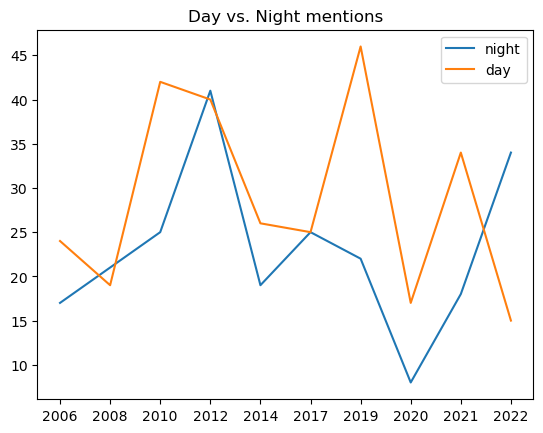

In [142]:
# Plotting the number of mentions of 'night' and 'day' through the years on the 
# same graph to help compare the two above tables.

plt.plot(yearly_mentions['album_year'], yearly_mentions['night'], label = 'night')
plt.plot(yearly_mentions['album_year'], yearly_mentions['day'], label = 'day')
plt.title("Day vs. Night mentions")

plt.legend()
plt.show()

In [143]:
# Testing to see if there's any noticeable trends in the mentions
# throughout the course of the songs.

# Creating a new column called "position" and assigning each lyrical line in the song a hash code based on its position in
# the album.  Example: All first lines of the first track in their album will share the same positional value.
lyrics['position'] = lyrics['track_n'] + (lyrics['line'] / 1000)

# Creating a new dataframe grouped by position.
positional_mentions = lyrics.groupby('position').sum().reset_index()

# The top line reads: Out of all the first lines in the discography, 1 of them references midnight, 2 of them reference night, 
# 2 of them reference day, and 2 of them reference time.
positional_mentions[['position', 'track_n', 'line', 'midnight', 'night', 'day', 'time']]

,position,track_n,line,midnight,night,day,time
0,1.001,10,10,1,2,2,2
1,1.002,10,20,0,1,0,0
2,1.003,10,30,0,0,1,0
3,1.004,10,40,0,1,1,0
4,1.005,10,50,0,0,1,0
...,...,...,...,...,...,...,...
1208,18.055,18,55,0,0,0,0
1209,18.056,18,56,0,0,0,0
1210,18.057,18,57,0,1,0,0
1211,18.058,18,58,0,0,0,0


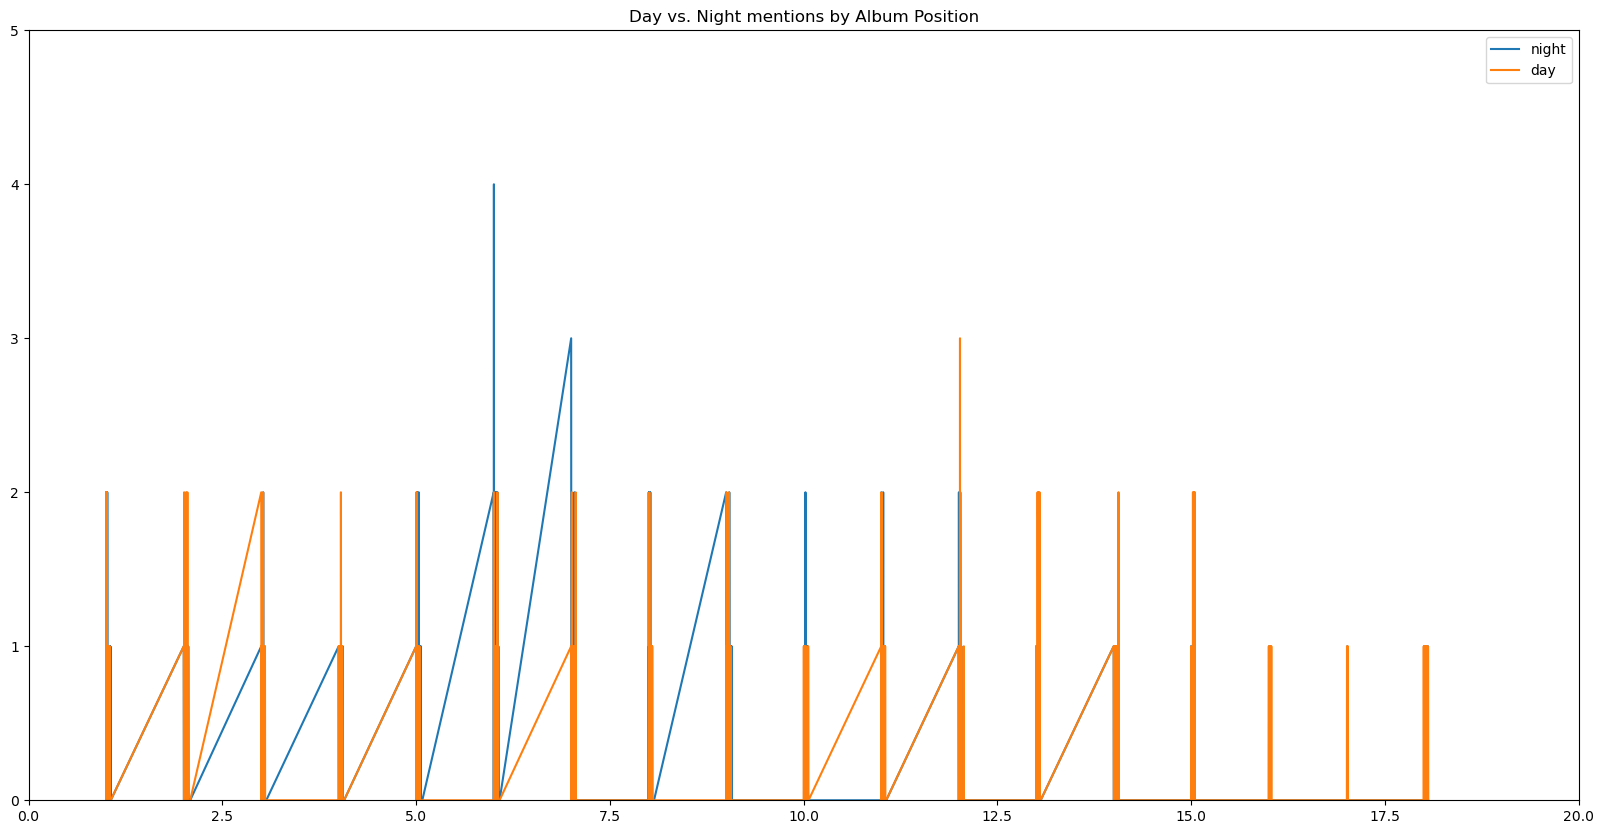

In [144]:
# Setting the size of the plot.
fig = plt.gcf()
fig.set_size_inches(20, 10)

# Creating a two-line plot with labels and lines to show frequency of 'night' and frequency of 'day'
# mentions.  The x axis is the positional value in the discography, and the 
plt.xlim(0, 20)
plt.ylim(0, 5)
plt.plot(positional_mentions['position'], positional_mentions['night'], label = 'night')
plt.plot(positional_mentions['position'], positional_mentions['day'], label = 'day')
plt.legend()
plt.title("Day vs. Night mentions by Album Position")

plt.show()

In [145]:
# Tokenize the words in our clean_lyric column by splitting them around space characters.

lyrics['lyrics_tok'] = lyrics['clean_lyric'].str.split(' ')

# Inspect the first five lines so we can see what the new lyrics_token column looks like.

lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,lyrics_tok
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said way my blue eyes shined,False,False,False,False,1.001,"[he, said, way, my, blue, eyes, shined]"
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002,"[put, georgia, stars, shame, night]"
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said thats lie,False,False,False,False,1.003,"[i, said, thats, lie]"
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just boy chevy truck,False,False,False,False,1.004,"[just, boy, chevy, truck]"
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005,"[tendency, gettin, stuck]"


In [146]:
# Determine what the most frequently used words are by first creating a list of all the words
# in the lyrics_token column.

word_list = []

for list_of_words in lyrics['lyrics_tok']:
    for word in list_of_words:
        word_list.append(word)


# Utilize the counter function to count the number of times each word appears.
word_frequency = collections.Counter(word_list)

# Sort the word frequencies to determine the most common words used.  
# word_frequency.items() returns a tuple, and key is the element in the tuple to sort by. The values are at index 1 of the tuple.
word_frequency = sorted(word_frequency.items(), key = lambda x: x[1], reverse = True)

# Display the word frequencies.
word_frequency

[('you', 2486),
 ('i', 2411),
 ('me', 940),
 ('my', 804),
 ('your', 574),
 ('all', 483),
 ('im', 483),
 ('like', 458),
 ('we', 441),
 ('know', 409),
 ('oh', 382),
 ('its', 377),
 ('so', 377),
 ('dont', 330),
 ('just', 325),
 ('never', 317),
 ('youre', 290),
 ('now', 285),
 ('love', 260),
 ('up', 258),
 ('time', 243),
 ('cause', 223),
 ('out', 218),
 ('no', 198),
 ('back', 194),
 ('do', 193),
 ('think', 185),
 ('one', 185),
 ('down', 180),
 ('see', 177),
 ('say', 174),
 ('they', 174),
 ('want', 161),
 ('go', 151),
 ('wanna', 150),
 ('got', 149),
 ('yeah', 148),
 ('baby', 142),
 ('ever', 140),
 ('he', 134),
 ('cant', 133),
 ('get', 128),
 ('right', 119),
 ('said', 118),
 ('ill', 116),
 ('stay', 114),
 ('thats', 113),
 ('did', 112),
 ('still', 109),
 ('look', 108),
 ('take', 108),
 ('gonna', 106),
 ('id', 105),
 ('tell', 103),
 ('ive', 101),
 ('made', 101),
 ('off', 99),
 ('ooh', 99),
 ('night', 98),
 ('good', 95),
 ('about', 94),
 ('too', 91),
 ('bad', 89),
 ('only', 89),
 ('around', 87)

In [147]:
# Adding an NLTK package for our sentiment analyzer.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rlawt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [148]:
# Testing out the sentiment analyzer.
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I love Taylor Swift!")

# Compound is a composite score that summarizes the overall sentiment of the string. A score closer to 1
# indicates a positive sentiment, a score closer to -1 indicates a negative sentiment, and 0 is neutral.
# It is created using a weighted average of the scores for pos, neg, and neu.  So the scores for each word 
# are combined, taking into account intensity and position of the word.  This first results in an intermediate
# score.  Then, the final compound score is computed as a weighted average of this intermediate score, the 
# positive score, the negative score, and the neutral score.

{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'compound': 0.7424}

In [149]:
# This particular analyzer takes in an entire string and applies its own tokenization process to it (per its documentation.)  
# Therefore, I don't want to use already tokenized lyrics.

# Apply sentiment analyzer's polarity_scores() function to everything in the clean_lyric column.
# Returns a dictionary to be stored in our new column containing values for 'negative', 'neutral', 'positive'.
lyrics['polarity'] = lyrics['clean_lyric'].apply(lambda x: sia.polarity_scores(x))

# Inspect the first five rows of the dataframe.
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,lyrics_tok,polarity
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said way my blue eyes shined,False,False,False,False,1.001,"[he, said, way, my, blue, eyes, shined]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002,"[put, georgia, stars, shame, night]","{'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'comp..."
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said thats lie,False,False,False,False,1.003,"[i, said, thats, lie]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just boy chevy truck,False,False,False,False,1.004,"[just, boy, chevy, truck]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005,"[tendency, gettin, stuck]","{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound..."


In [150]:
# Transform the column with the polarity dictionaries into new, separate columns for each value using pandas series.
lyrics[['neg', 'neu', 'pos', 'compound']] = lyrics['polarity'].apply(pd.Series)

# Drop the polarity column because A) we no longer need it, and B) we won't be able to sum the dataframe anymore 
# with it in it.
lyrics = lyrics.drop('polarity', axis = 1)

In [151]:
# Inspect first five rows.
lyrics.head()

,album_name,track_title,track_n,lyric,line,album_year,clean_lyric,midnight,night,day,time,position,lyrics_tok,neg,neu,pos,compound
0,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said way my blue eyes shined,False,False,False,False,1.001,"[he, said, way, my, blue, eyes, shined]",0.000,1.000,0.0,0.0000
1,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put georgia stars shame night,False,True,False,False,1.002,"[put, georgia, stars, shame, night]",0.437,0.563,0.0,-0.4767
2,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said thats lie,False,False,False,False,1.003,"[i, said, thats, lie]",0.000,1.000,0.0,0.0000
3,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just boy chevy truck,False,False,False,False,1.004,"[just, boy, chevy, truck]",0.000,1.000,0.0,0.0000
4,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,tendency gettin stuck,False,False,False,False,1.005,"[tendency, gettin, stuck]",0.500,0.500,0.0,-0.2500


In [152]:
# Calculate the total (overall) postivity, negativity and compound score for our lyrics dataframe.
pos = sum(lyrics['pos'])
neg = sum(lyrics['neg'])
compound = sum(lyrics['compound'])

# Print the sums.
print("positive: ", pos)
print("negative: ", neg)
print("compound: ", compound)

positive:  1140.0939999999973
negative:  755.9870000000012
compound:  380.8444000000003


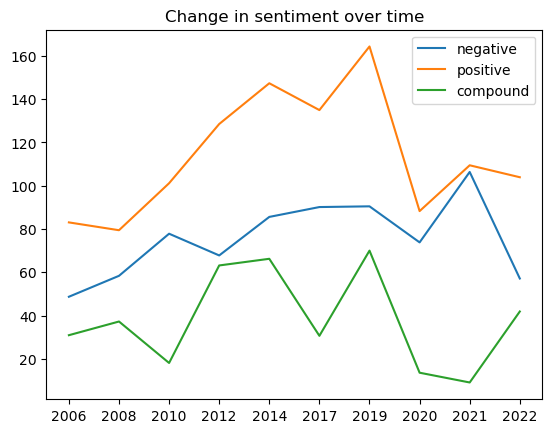

In [153]:
# Create a new DataFrame using the groupby method for the album_year
yearly_sentiment = lyrics.groupby('album_year').sum().reset_index()

# Plot the change in sentiment over time.
plt.plot(yearly_sentiment['album_year'], yearly_sentiment['neg'], label = 'negative')
plt.plot(yearly_sentiment['album_year'], yearly_sentiment['pos'], label = 'positive')
plt.plot(yearly_sentiment['album_year'], yearly_sentiment['compound'], label = 'compound')
plt.legend()
plt.title("Change in sentiment over time")
plt.show()

In [154]:
# Create a dataframe filtered for only night mentions (contains only the lines that reference night.)
night = lyrics[lyrics['night'] == True]

# Do the same for day mentions.
day = lyrics[lyrics['day'] == True]

# Check the length of the night and day dataframes
print("night: ", len(night))
print("day: ", len(day))

night:  230
day:  288


In [155]:
# Take the dataframes that have been filtered for night and day and sum their compound column.
night_sentiment = night['compound'].sum()
day_sentiment = day['compound'].sum()

# Print the sentiment compounds.
print("night sentiment: ", night_sentiment)
print("day sentiment: ", day_sentiment)

night sentiment:  14.4254
day sentiment:  18.665100000000002
